In [1]:
install.packages("readxl",dependencies= TRUE)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("readxl", dependencies = TRUE):
“installation of package ‘readxl’ had non-zero exit status”


In [2]:
library(readxl)
library(tidyverse)
library(readxl)
library(readr)
library(magrittr)
library(purrr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
library(glue)
library(stringr)
library(ggplot2)
library(xml2)

In [4]:
library(rvest)
library(png)
library(grid)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [5]:
"/home/mathuser/overseas-merchandise-trade-june-2020.xlsx" %>% read_excel() %>% glimpse()

New names:
• `` -> `...2`


Rows: 39
Columns: 2
$ `Overseas merchandise trade: June 2020` <chr> NA, "List of tables", "1.01", …
$ ...2                                    <chr> NA, NA, "Overseas merchandise …


In [6]:
June_year_ended <- read_excel('/home/mathuser/overseas-merchandise-trade-june-2020.xlsx',sheet=2)
new_data_frame <- June_year_ended[15:24,1:ncol(June_year_ended)]
new_data_frame

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`


Table 1.01,...2,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15,...16
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<chr>
June,2011,NA,46072.276282999999,NA,13.3,45072.975696000001,NA,12.5,999.30058699999802,NA,1850.5735979999999,NA,886.18138199999999,NA,42665.605775000004
June,2012,NA,46688.062463000002,NA,1.3,47450.564901999998,NA,5.3,-762.502438999996,NA,1795.1715059999999,NA,437.963461,NA,45059.724305999996
June,2013,NA,45704.290138999997,NA,-2.1,46523.629657999998,NA,-2,-819.33951900000102,NA,1591.3315970000001,NA,0,NA,44159.194427800001
June,2014,NA,51161.136424999997,NA,11.9,49972.347973999997,NA,7.4,1188.7884509999999,NA,1801.410378,NA,619.83950600000003,NA,47469.147407999997
June,2015,NA,48396.163181000004,NA,-5.4,51370.699181000004,NA,2.8,-2974.5360000000001,NA,2127.805879,NA,879.82218799999998,NA,48814.739003000002
June,2016,NA,49324.864243000004,NA,1.9,52660.152428000001,NA,2.5,-3335.2881849999999,NA,2192.6332240000002,NA,730.75116400000002,NA,50075.302584999998
June,2017,NA,49873.491507999999,NA,1.1000000000000001,53530.298793000002,NA,1.7,-3656.8072849999999,NA,1786.6407180000001,NA,760.22160399999996,NA,51130.992549000002
June,2018,NA,55490.192916,NA,11.3,59696.459421,NA,11.5,-4206.2665049999996,NA,1909.8262380000001,NA,520.255178,NA,57094.020763
June,2019,NA,59378.412551000001,NA,7,64365.619809000003,NA,7.8,-4987.2072580000004,NA,2028.076458,NA,384.657104,NA,61507.597001000002


In [7]:
selected_columns <- new_data_frame[,c(1,2,4,7)]

In [17]:
Export_import <- data.frame(
    Month = selected_columns[,1],
    Year = selected_columns[,2],
  Exportsfob = selected_columns[,3],
    Importcif = selected_columns[,4]
    )

In [18]:
print(Export_import)

   Table.1.01 ...2               ...4               ...7
1        June 2011 46072.276282999999 45072.975696000001
2        June 2012 46688.062463000002 47450.564901999998
3        June 2013 45704.290138999997 46523.629657999998
4        June 2014 51161.136424999997 49972.347973999997
5        June 2015 48396.163181000004 51370.699181000004
6        June 2016 49324.864243000004 52660.152428000001
7        June 2017 49873.491507999999 53530.298793000002
8        June 2018       55490.192916       59696.459421
9        June 2019 59378.412551000001 64365.619809000003
10       June 2020 60200.897663000003 61396.446889999999


In [19]:
colnames(Export_import) <- c("Month","Year","Exportfob","Importcif")

In [21]:
print(Export_import)

   Month Year          Exportfob          Importcif
1   June 2011 46072.276282999999 45072.975696000001
2   June 2012 46688.062463000002 47450.564901999998
3   June 2013 45704.290138999997 46523.629657999998
4   June 2014 51161.136424999997 49972.347973999997
5   June 2015 48396.163181000004 51370.699181000004
6   June 2016 49324.864243000004 52660.152428000001
7   June 2017 49873.491507999999 53530.298793000002
8   June 2018       55490.192916       59696.459421
9   June 2019 59378.412551000001 64365.619809000003
10  June 2020 60200.897663000003 61396.446889999999


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

   Month Year          Exportfob          Importcif
1   June 2011 46072.276282999999 45072.975696000001
2   June 2012 46688.062463000002 47450.564901999998
3   June 2013 45704.290138999997 46523.629657999998
4   June 2014 51161.136424999997 49972.347973999997
5   June 2015 48396.163181000004 51370.699181000004
6   June 2016 49324.864243000004 52660.152428000001
7   June 2017 49873.491507999999 53530.298793000002
8   June 2018       55490.192916       59696.459421
9   June 2019 59378.412551000001 64365.619809000003
10  June 2020 60200.897663000003 61396.446889999999


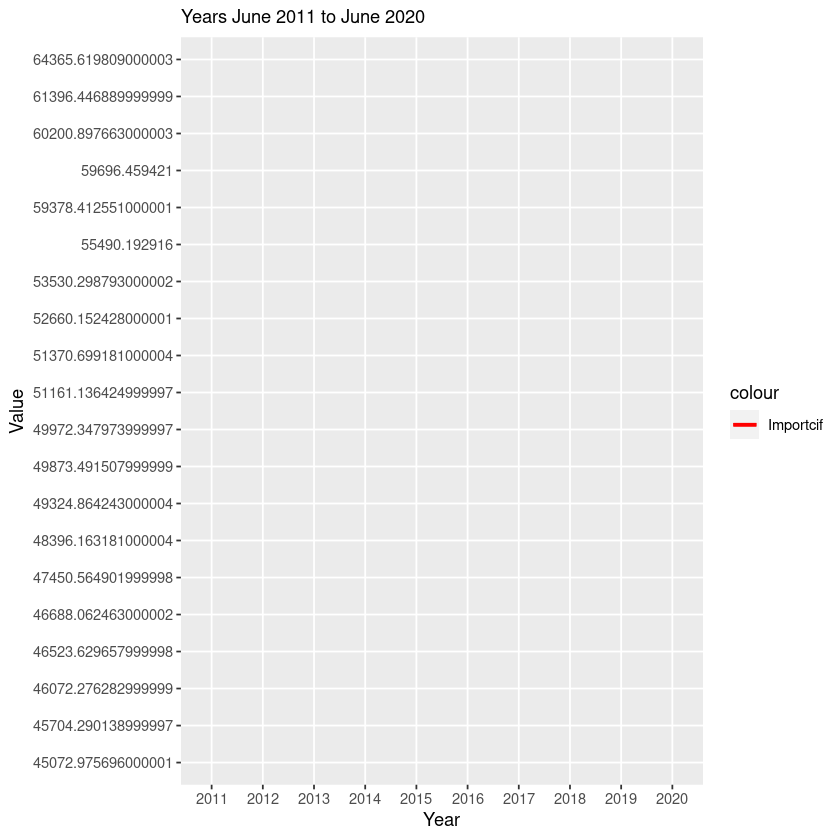

In [34]:
ggplot(Export_import,aes(x=Year))+
geom_line(aes(y=Exportfob, color="Exportfob"), size=1)+
geom_line(aes(y=Importcif, color="Importcif"), size=1)+
labs(titile = "Export VS. Import over 10 years", 
     subtitle ="Years June 2011 to June 2020", x= "Year", y="Value")+
     scale_color_manual(values= c("Exportfbo"="blue","Importcif"="red"))
theme_minimal() 
print(Export_import)

In [35]:
library(tidyverse)
library(ggplot2)
library(readxl)

In [36]:
export <- read_excel("Newdata.xlsx", sheet=1)

In [37]:
historical <- subset(export, Year<=2018)

In [38]:
df2 <- historical %>% group_by(Country,ID) %>% summarise(Exports=mean(Exports),
                                                         Year="16-18",
                                                         .groups="drop") %>%
as.data.frame()

Warning message:
“`position_dodge()` requires non-overlapping x intervals”


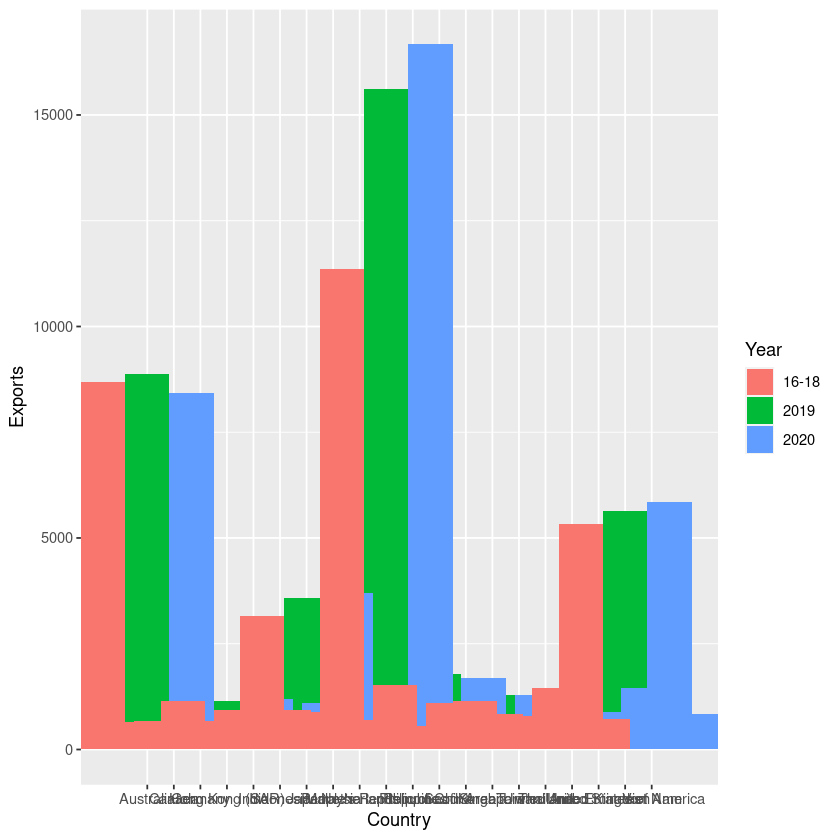

In [45]:
newdata<- rbind(subset(export, Year>2018),df2)
ggplot(newdata, aes(fill=Year, x=Exports,
                    y=Country))+
geom_bar(position="dodge",stat="identity",
         width=5) + coord_flip()